<a href="https://colab.research.google.com/github/kasun98/twitter_sentiment_analyse/blob/main/twitter_sentiment_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis using Machine Learning

In [1]:
#import necessary libraries
!pip install wordcloud

from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
#import dataset
tweets_df = pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


id       0
label    0
tweet    0
dtype: int64


<Axes: >

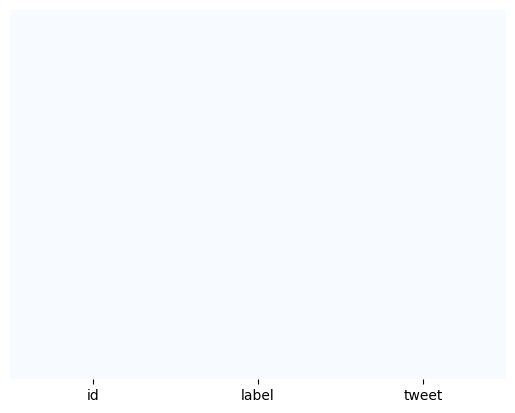

In [3]:
#cheching for null values
print(tweets_df.isnull().sum())
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [4]:
#statistical summary of dataset
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

In [6]:
#get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

<Axes: ylabel='Frequency'>

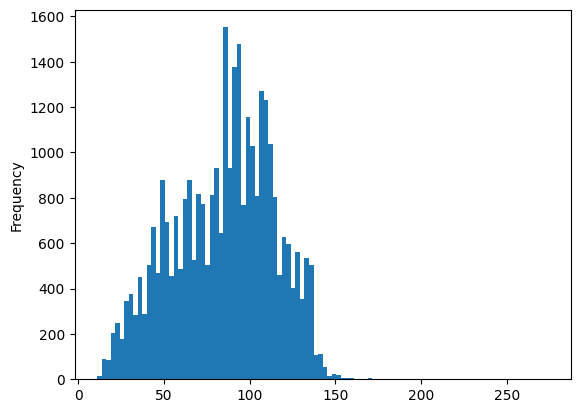

In [7]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins=100, kind='hist')

In [8]:
#Word Cloud

positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]
sentences = tweets_df['tweet'].tolist()
sentences_as_one_string =" ".join(sentences)


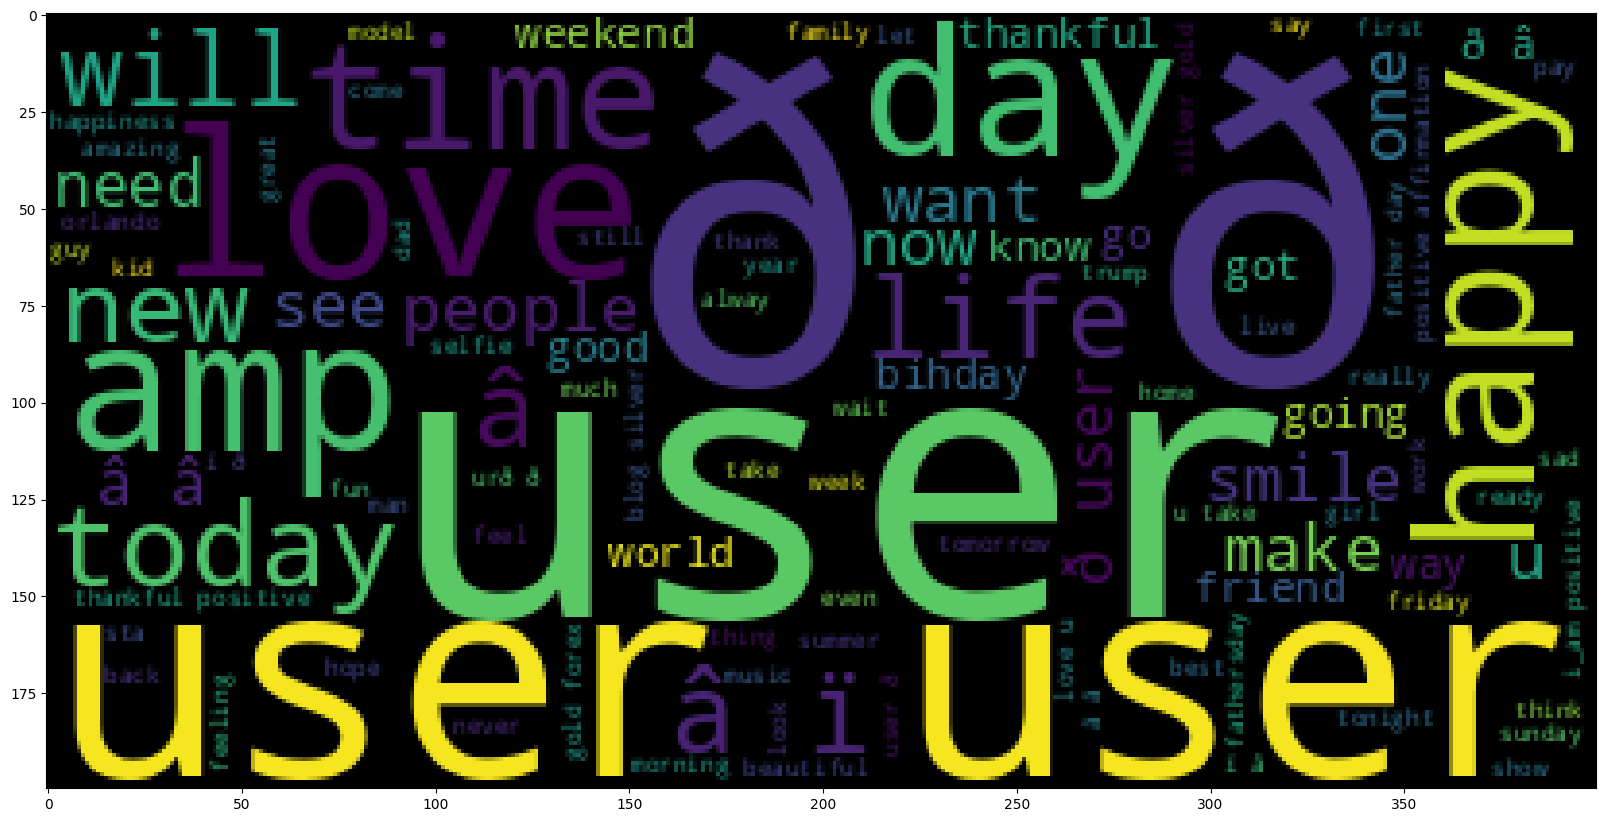

In [9]:
#word cloud for all tweets
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

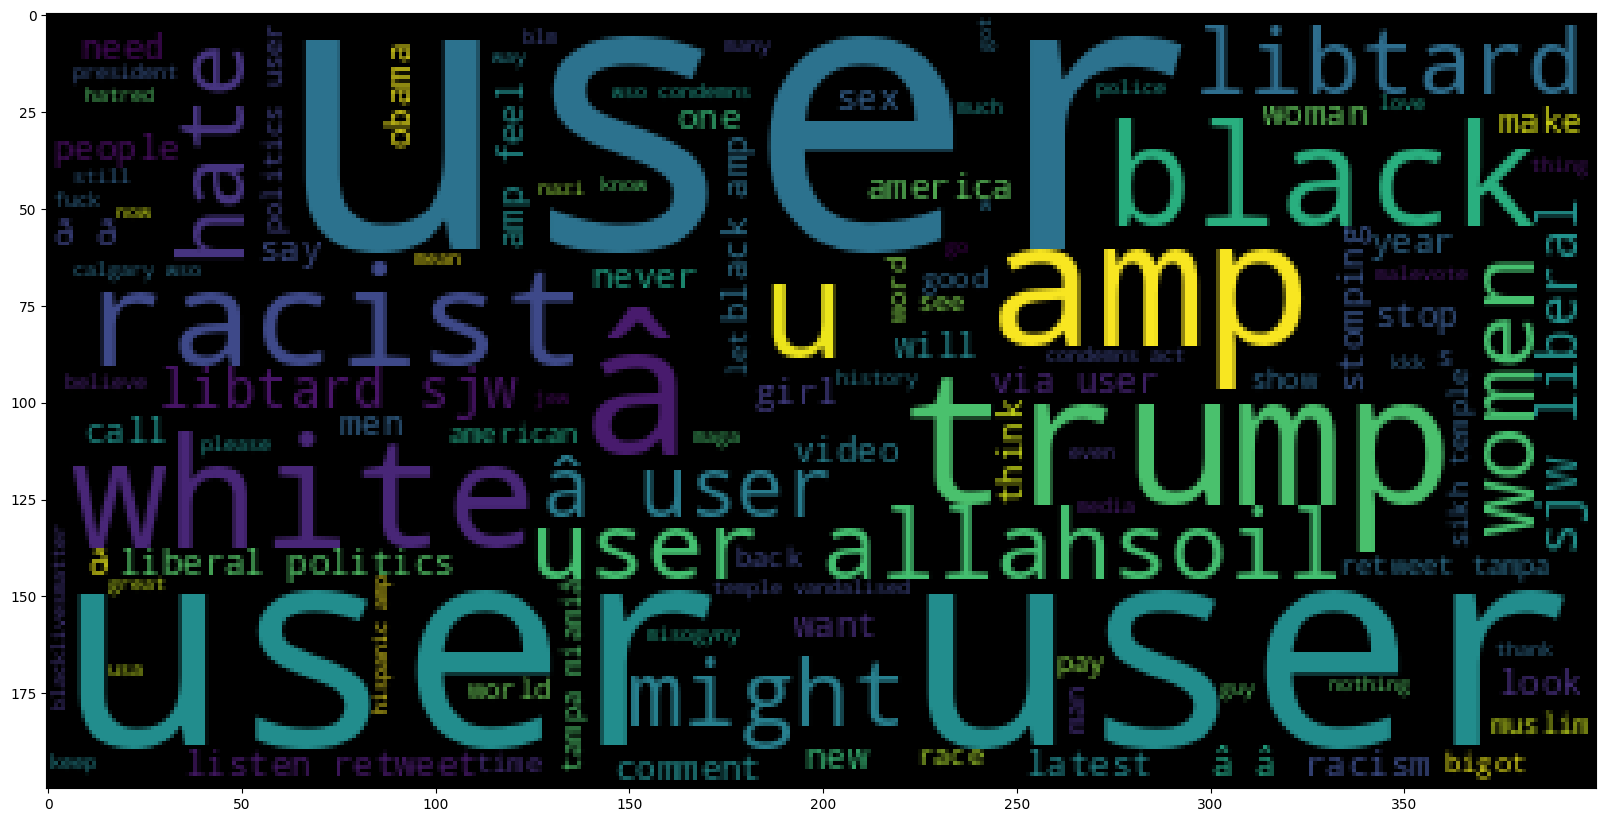

In [10]:
#word cloud for negative tweets
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

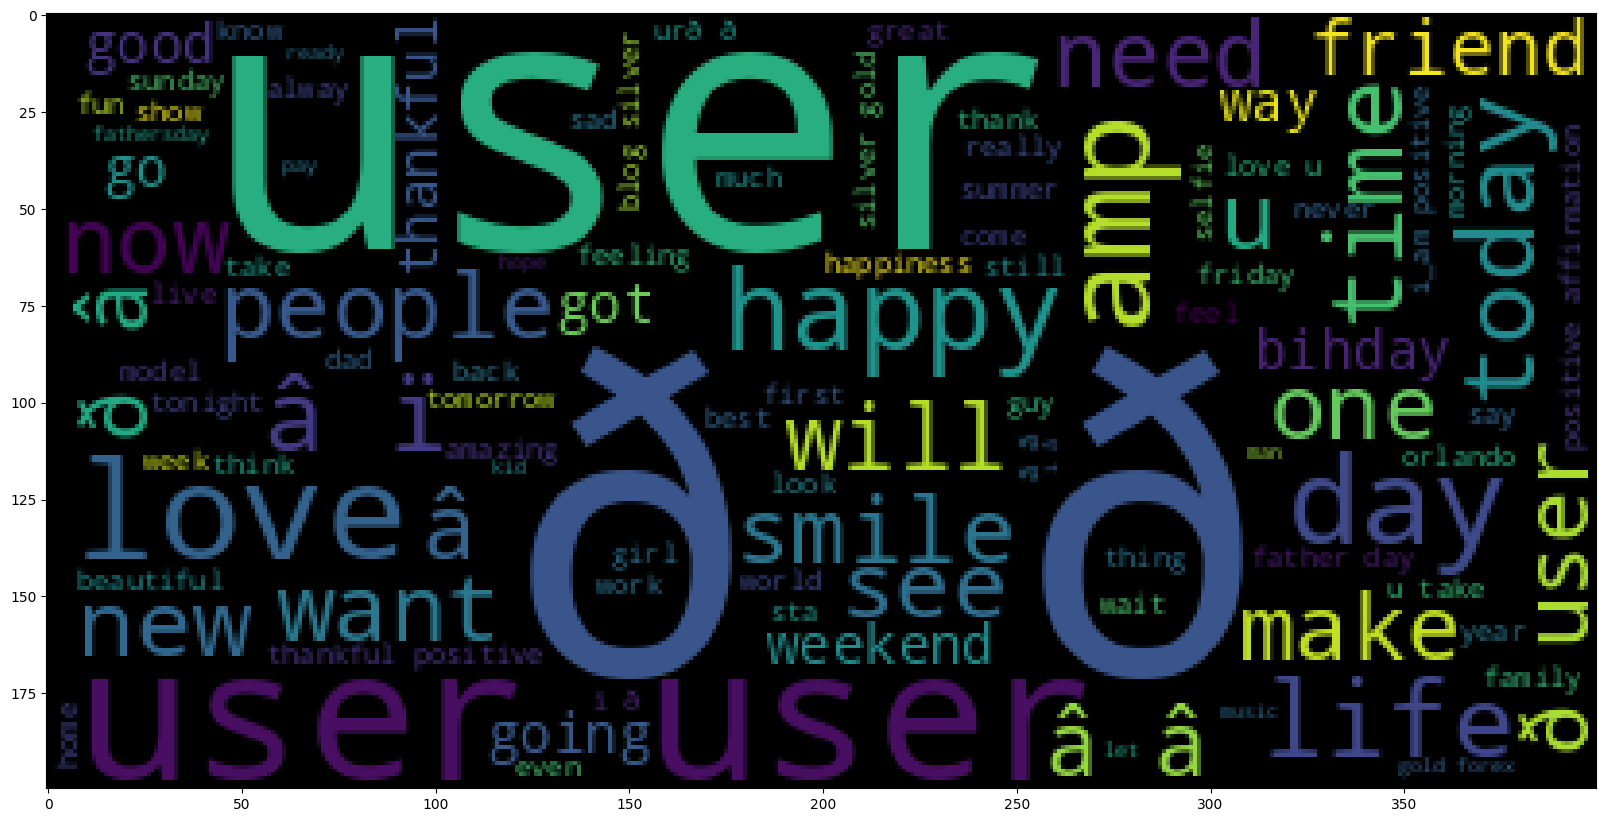

In [11]:
#word cloud for positive tweets
positive_list = positive['tweet'].tolist()
positive_list
positive_sentences_as_one_string = " ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))

In [12]:
#Data cleaning
#remove stopwords

nltk.download('stopwords')

# Define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [14]:
# Define the cleaning pipeline defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
tweets_countvectorizer.shape

(31962, 47386)

In [16]:
#finalize the dataset

X = pd.DataFrame(tweets_countvectorizer.toarray())
y = tweets_df['label']

In [17]:
import gc
gc.collect()

0

In [ ]:
#TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [ ]:
gc.collect()

In [ ]:
#Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [ ]:
gc.collect()

In [ ]:
#Gradient boosting classifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))